In [1]:
import sys

In [1]:
from sndstraj.utils.helpers import start_sc
import pyspark.sql.functions as func
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [3]:
from sndstraj.utils.fake_data_sampler import random_date, sample_patients

from sndstraj.cohorts.describeCohort import add_age, age_pyramide_plot, compute_age_bucket_count, describe_demographics, stratified_sampling_on_gender_age

In [4]:
sqlcontext = start_sc(4)

In [5]:
path2test_data = '../studies/template/data/sample10K.parquet'
path2test_patients = '../studies/template/data/patients10K.parquet'

events = sqlcontext.read.parquet(path2test_data)
raw_patients = sqlcontext.read.parquet(path2test_patients)
events.show(5)
raw_patients.show()

+---------+---------------+--------+--------+------+-------------------+----+
|patientID|       category|   value| groupID|weight|              start| end|
+---------+---------------+--------+--------+------+-------------------+----+
|    pID-0|main_diagnostic|    J960|pfsID-67|   0.0|2017-04-05 02:00:00|null|
|    pID-0|           drug|Anti_Il5|pfsID-37|   0.0|2017-01-31 01:00:00|null|
|    pID-0|main_diagnostic|    J960|pfsID-32|   0.0|2017-05-26 02:00:00|null|
|    pID-0|           drug|Anti_IgE|pfsID-59|   0.0|2017-07-21 02:00:00|null|
|    pID-0|main_diagnostic|    J440|pfsID-83|   0.0|2017-11-28 01:00:00|null|
+---------+---------------+--------+--------+------+-------------------+----+
only showing top 5 rows

+---------+------+-------------------+-------------------+
|patientID|gender|          birthDate|          deathDate|
+---------+------+-------------------+-------------------+
|    pID-0|     1|1938-10-28 00:00:00|               null|
|    pID-1|     1|1921-03-25 01:00:00

In [6]:
patients = add_age(raw_patients)
old_patients = patients.filter(func.col('age')>=40)

In [10]:
target_patients = old_patients.sample(0.4)
stratified_control_patients = stratified_sampling_on_gender_age(
    target_patients = target_patients,
    control_patients=patients
)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' i

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


Taille population : 2586
Part femmes : 1332/2586 = 0.5151
Part DCD : 1176/2586 = 0.4548


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


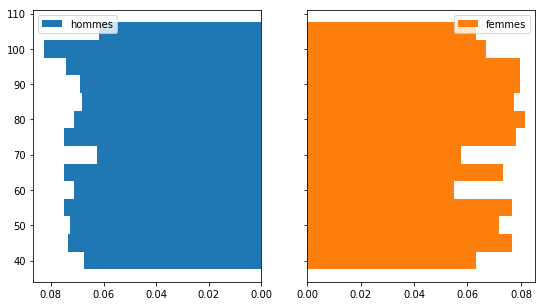

In [11]:
describe_demographics(target_patients)
_ = age_pyramide_plot(target_patients)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


Taille population : 2555
Part femmes : 1290/2555 = 0.5049
Part DCD : 1131/2555 = 0.4427


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


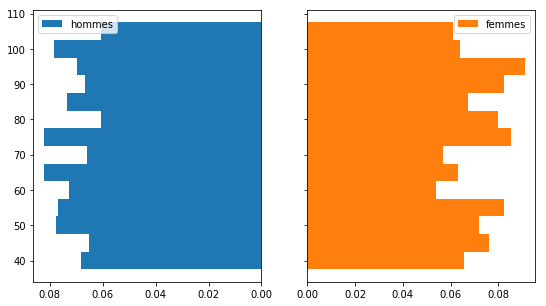

In [12]:
describe_demographics(stratified_control_patients)
_ = age_pyramide_plot(stratified_control_patients)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


Taille population : 10000
Part femmes : 5006/10000 = 0.5006
Part DCD : 2831/10000 = 0.2831


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyspark/sql/dataframe.py:2102: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


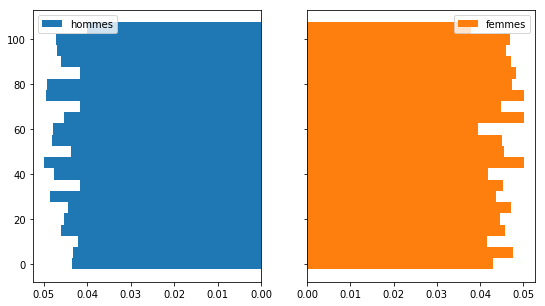

In [14]:
describe_demographics(patients)
_ = age_pyramide_plot(patients)